In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [256]:
fdirect=pd.read_csv('fdirect_data3.csv')
fdirect[:1]


,Unnamed: 0,nameFD,nameFD.1,categoryFDO,categoryFDS,descFD,priceFD,priceFDt1,priceFDea,priceFDt4volweight,priceFDt5,priceFDt6
0,0,Rao's Homemade Marinara Sauce,Rao's Homemade Marinara Sauce,jarsauce,pasta,32oz,\t\t$8.99/ea($4.50/lb),8.99,ea(,4.50/lb),NaN,NaN


In [257]:
ctown = pd.read_csv('ctowndataw001.csv')
ctown


,Unnamed: 0,nameCT,Unnamed: 2,categoriesCT,descCT,doublon,priceOCT,priceFinalCT,priceFinalAddCT
0,0,southern blueberries,southern blueberries,Produce,Fresh 1 Pint Cntr. *RASPBERRIES Imported 6 Oz....,1,1.99,1.990,NaN
1,1,apple & eve apple juice,apple & eve apple juice,Beverages,Clear or Natural Style 64 Oz. Btl.,1,1.99,1.990,NaN
2,2,bounty towels bundle pk,bounty towels bundle pk,General Merchandise,"w/Prints, White, or Select-A-Size (40-70 sh.) ...",1,7.99,7.990,NaN
3,3,butterball chicken breast,butterball chicken breast,Deli,Freshly Sliced To Order,1,6.99 lb.,6.990,lb.
4,4,classico pasta sauce,classico pasta sauce,Grocery,15-24 Oz. Jars or Pesto Sauce (8.1 Oz.),1,1.99,1.990,NaN
5,5,clorox liquid bleach,clorox liquid bleach,General Merchandise,64 Oz. Btl. or Smart Seek or Splash-Less (55 Oz.),1,2.49,2.490,NaN
6,6,coca-cola,coca-cola,Beverages,"or Regular or Diet: All Varieties: Fuze, Minut...",1,3 FOR $4,1.333,3
7,7,cooked large shrimp,cooked large shrimp,Seafood,31/40 Ct. 1 lb. Bag,1,8.99,8.990,NaN
8,8,dawn dish liquid,dawn dish liquid,General Merchandise,Assorted Varieties 9 Oz. Btl.,1,99¢,0.990,NaN
9,9,era 2x liquid detergent,era 2x liquid detergent,General Merchandise,"26-32 Load: Oxi Booster, Free, or Regular 50 O...",1,2.99,2.990,NaN


In [258]:
keyfood = pd.read_csv('keyfood_data2.csv')
keyfood[:1]

,Unnamed: 0,nameKF,CategoryKF,descKF,pictlinkKF,priceO,PriceKFF,PriceKFFQuantity,DoublonKF
0,0,Beechnut Cereal,Baby Store,"8 Oz Box\r\nRice, Oatmeal or Multi-Grain\r\n8 ...",http://ctmwg.mywebgrocer.com/imagesCir/C_15327...,$1.99,1.99,NaN,1


In [259]:
fdirect.priceFDt1[fdirect.priceFDt1<>0][:10]

0    8.99
1    3.99
2    2.79
3    2.99
4    4.99
5    5.19
6    3.29
7    4.39
8    5.49
9    2.99
Name: priceFDt1, dtype: float64

(0, 30)

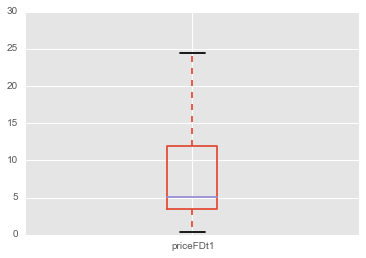

In [260]:
x = fdirect.priceFDt1[fdirect.priceFDt1>0]
x.plot(kind='box')
plt.ylim([0,30])


In [261]:
keyfood.PriceKFF = keyfood.PriceKFF.convert_objects(convert_numeric=True)

ctown.priceFinalCT = ctown.priceFinalCT.convert_objects(convert_numeric=True)

ctown.priceFinalCT

0       1.990
1       1.990
2       7.990
3       6.990
4       1.990
5       2.490
6       1.333
7       8.990
8       0.990
9       2.990
10      3.990
11      2.500
12      3.990
13      5.990
14      7.990
15      0.990
16      1.500
17      0.990
18      5.990
19      4.990
20      3.990
21      0.590
22      3.490
23      0.000
24      3.990
25      3.990
26      1.490
27      2.500
28      3.490
29      3.000
        ...  
277     2.990
278     2.490
279     3.490
280     3.490
281     1.990
282     2.490
283     4.390
284     0.590
285     2.990
286    12.990
287     3.990
288     2.990
289     0.990
290     5.990
291     7.990
292     4.990
293     3.690
294     7.990
295     3.990
296     5.990
297     7.990
298     5.990
299     3.990
300     1.490
301    11.990
302     1.500
303     3.990
304     2.500
305     1.490
306     3.990
Name: priceFinalCT, dtype: float64

In [262]:

df = pd.concat([ctown.priceFinalCT,keyfood.PriceKFF,fdirect.priceFDt1], axis=1)
df.columns=[ 'C Town (Weekly Circular)', 'Key Food (Weekly Circular)','Fresh Direct (Online)']
moyenne1 = df.mean()
moyenne1


C Town (Weekly Circular)       3.545948
Key Food (Weekly Circular)     3.818860
Fresh Direct (Online)         10.285297
dtype: float64

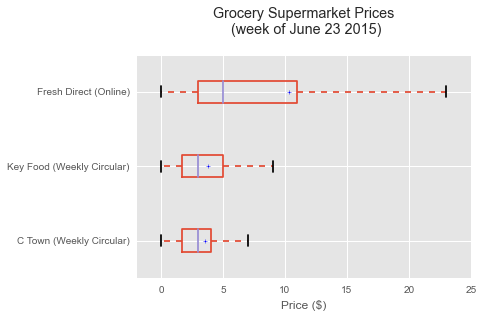

In [263]:
df.boxplot(vert=False)
plt.xlim([-2,25])
plt.xlabel('Price ($)')
plt.title('Grocery Supermarket Prices \n (week of June 23 2015)\n')
plt.scatter(moyenne1,[1,2,3], marker='+')
plt.savefig('grocery Sup Prices g1.png')

In [266]:
fdirectcatgroup = fdirect.groupby('categoryFDS')
keyfoodcatgroup = keyfood.groupby('CategoryKF')
ctowncatgroup = ctown.groupby('categoriesCT')


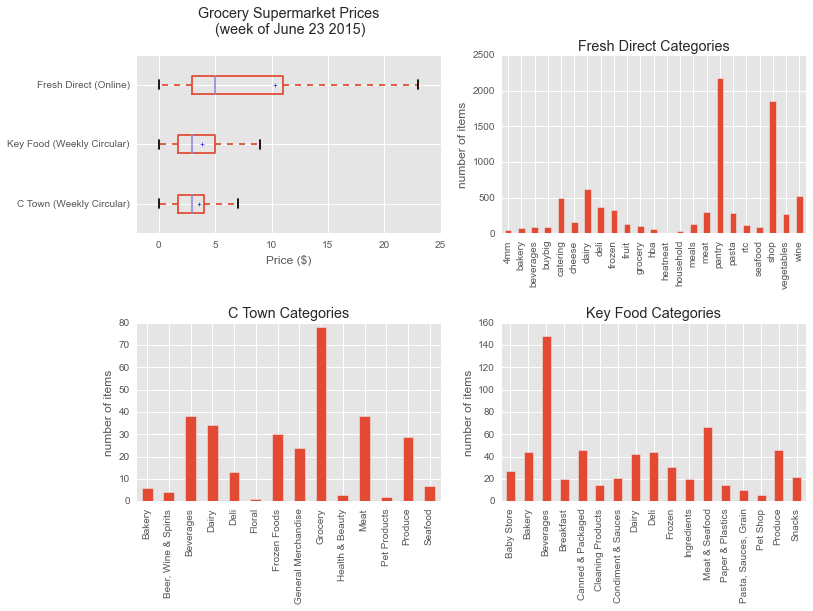

In [279]:

plt.rcParams['figure.figsize'] = 12, 8
plt.subplot(221)
df.boxplot(vert=False)
plt.xlim([-2,25])
plt.xlabel('Price ($)')
plt.title('Grocery Supermarket Prices \n (week of June 23 2015)\n')
plt.scatter(moyenne1,[1,2,3], marker='+')

plt.subplot(222)
fdirectcatgroup.count().nameFD.plot(kind='bar')
plt.xlabel('')
plt.ylabel('number of items')
plt.title('Fresh Direct Categories')

plt.subplot(223)
ctowncatgroup.count().nameCT.plot(kind='bar')
plt.xlabel('')
plt.ylabel('number of items')
plt.title('C Town Categories')

plt.subplot(224)
keyfoodcatgroup.count().nameKF.plot(kind='bar')
plt.xlabel('')
plt.ylabel('number of items')
plt.title('Key Food Categories')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.5)

left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.2   # the amount of width reserved for blank space between subplots
hspace = 2   # the amount of height reserved for white space between subplots

In [439]:
ctkeyf=pd.read_csv('ctownkeyfood.csv')


In [440]:
ctkeyfs1 = ctkeyf.ctownP.sum()
ctkeyfs2 = ctkeyf.KeyfoodP.sum()
ctkeyfm1 = ctkeyf.ctownP.mean()
ctkeyfm2 = ctkeyf.KeyfoodP.mean()
print ctkeyfs1, ctkeyfs2, ctkeyfm1, ctkeyfm2
ctkeyf.columns = ['Product','Category','CTown','Keyfood']

48.293333333 48.696666667 2.84078431371 2.86450980394


In [ ]:
plt.bar([1,2],[ctkeyfs1,ctkeyfs2],0.4,label=['CTown','Keyfood'])
plt.xlabels=(['CTown','Keyfood'])
plt.tick_params(
   axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

data = pd.DataFrame({'Supermarkets' : ['Ctown','Keyfood','Fresh Direct'],'references' : [308,411,8370]})

plt.plot(data,'Supermarkets','references',color=['y', 'r', 'g'],kind='bar')

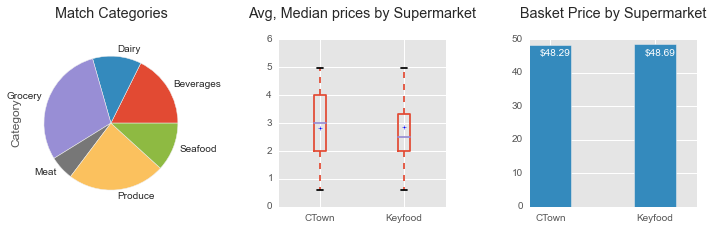

In [462]:
#df2 = pd.concat([ctkeyf.Category,ctkeyf.Category.count(by=Category)])
#df2.plot( kind='pie', fontsize=15)

plt.rcParams['figure.figsize'] = 12,3
plt.subplot(131)

toto2 = ctkeyf.Category.groupby(ctkeyf.Category).count()
toto2.plot( kind='pie')


plt.title('Match Categories \n')
plt.subplot(132)

ctkeyf.boxplot()
plt.scatter([1,2],[2.84,2.86], marker='+')
plt.ylim([0,6])

plt.title('Avg, Median prices by Supermarket \n')


ax = plt.subplot(133)

plt.bar([1,2],[ctkeyfs1,ctkeyfs2],0.4,label=('CTown','Keyfood'),align='center')
ax.set_xticks([1,2])
ax.set_xticklabels( ('CTown', 'Keyfood') )
plt.text(.90,45,'$48.29', color='w')
plt.text(1.90,45,'$48.69', color='w')
plt.tick_params(
   axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='on')
plt.title('Basket Price by Supermarket \n')
#help(plt.bar)
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.5)

left  = None  # the left side of the subplots of the figure
right = None   # the right side of the subplots of the figure
bottom = None   # the bottom of the subplots of the figure
top = None      # the top of the subplots of the figure
wspace = .5   # the amount of width reserved for blank space between subplots
hspace = None   # the amount of height reserved for white space between subplots
plt.subplots_adjust(left, bottom, right, top, wspace, hspace)



In [344]:
data = pd.DataFrame({'title' : ['Ctown','Keyfood'],'sum' : [ctkeyfs1,ctkeyfs2], 
                     'mean' : [ctkeyfm1,ctkeyfm2]})

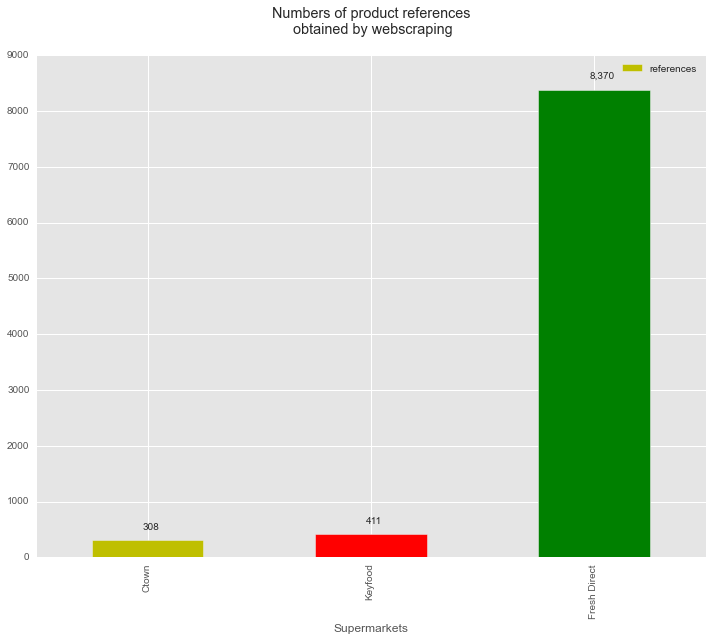

In [437]:
data = pd.DataFrame({'Supermarkets' : ['Ctown','Keyfood','Fresh Direct'],'references' : [308,411,8370]})
plt.rcParams['figure.figsize'] = 12,9
data.plot('Supermarkets','references',color=['y', 'r', 'g'],kind='bar')
plt.title('Numbers of product references \n obtained by webscraping \n')
plt.text(-.02,500,'308')
plt.text(.98,600,'411')
plt.text(1.98,8600,'8,370')

NameError: name 'scatter' is not defined

In [482]:
kffd=pd.read_csv('keyfoodfreshdirect.csv')
kffd

,Product,Category,KeyFood,FreshDirect
0,Café Bustelo Coffee,Beverages,1.99,2.5740
1,tropicana pure premium orange juice,Beverages,2.99,4.2900
2,post honey bunches of oats,Breakfast,5.99,10.3275
3,Classico Pasta Sauce,Condiment & Sauces,2.00,3.2900
4,Citterio Fresco Prosciutto,Deli,4.99,5.9900
5,Hebrew National Beef Franks,Meat & Seafood,3.99,5.9900
6,fresh baby back pork ribs,Meat & Seafood,4.99,5.9900
7,Pork Spareribs,Meat & Seafood,2.49,3.9900
8,organic grape tomatoes,Produce,2.50,3.9900
9,Yellow Corn,Produce,0.50,0.6900


In [483]:
kffds1 = kffd.KeyFood.sum()
kffds2 = kffd.FreshDirect.sum()
kffdm1 = kffd.KeyFood.mean()
kffdm2 = kffd.FreshDirect.mean()
print kffds1, kffds2, kffdm1, kffdm2
kffd.columns = ['Product','Category','Key Food','Fresh Direct']

32.43 47.1215 3.243 4.71215


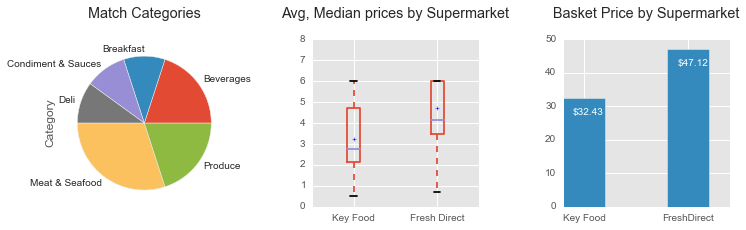

In [493]:
#### plt.rcParams['figure.figsize'] = 12,3
plt.subplot(131)

toto2 = kffd.Category.groupby(kffd.Category).count()
toto2.plot( kind='pie')


plt.title('Match Categories \n')
plt.subplot(132)

kffd.boxplot()
plt.scatter([1,2],[kffdm1,kffdm2], marker='+')
plt.ylim([0,8])

plt.title('Avg, Median prices by Supermarket \n')


ax = plt.subplot(133)

plt.bar([1,2],[kffds1,kffds2],0.4,label=('Key Food','FreshDirect'),align='center')
ax.set_xticks([1,2])
ax.set_xticklabels( ('Key Food','FreshDirect') )
plt.text(.90,kffds1-5,'$32.43', color='w')
plt.text(1.90,kffds2-5,'$47.12', color='w')
plt.tick_params(
   axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='on')
plt.title('Basket Price by Supermarket \n')
#help(plt.bar)
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.5)

left  = None  # the left side of the subplots of the figure
right = None   # the right side of the subplots of the figure
bottom = None   # the bottom of the subplots of the figure
top = None      # the top of the subplots of the figure
wspace = .5   # the amount of width reserved for blank space between subplots
hspace = None   # the amount of height reserved for white space between subplots
plt.subplots_adjust(left, bottom, right, top, wspace, hspace)


In [494]:
ctfd=pd.read_csv('ctownfreshdirect.csv')
ctfd

,Product,Category,CTown,FreshDirect
0,apple & eve apple juice,Beverages,1.99,2.81125
1,classico pasta sauce,Grocery,1.99,3.29000
2,fresh baby back pork ribs,Meat,3.99,5.99000
3,post honey bunches of oats,Grocery,3.49,4.59000
4,tropicana pure premium orange juice,Dairy,3.49,3.83100
5,classico pasta sauce,Grocery,1.99,3.29000
6,kellogg's special k cereal,Grocery,3.99,4.89000
7,kikkoman soy sauce,Grocery,1.19,2.29000
8,mott's apple sauce,Grocery,1.99,2.79000
9,smucker's grape jelly,Grocery,1.99,2.79000


In [496]:
ctfds1 = ctfd.CTown.sum()
ctfds2 = ctfd.FreshDirect.sum()
ctfdm1 = ctfd.CTown.mean()
ctfdm2 = ctfd.FreshDirect.mean()
print ctfds1, ctfds2, ctfdm1, ctfdm2
ctfd.columns = ['Product','Category','C Town','Fresh Direct']

71.54 98.19225 3.97444444444 5.455125


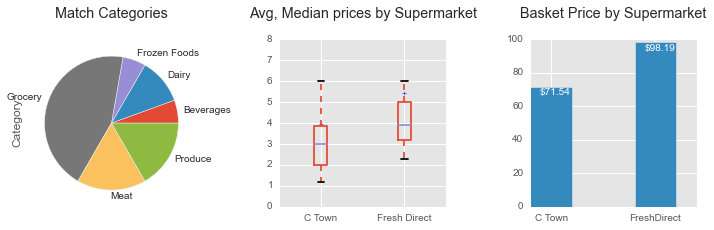

In [498]:
plt.subplot(131)

toto2 = ctfd.Category.groupby(ctfd.Category).count()
toto2.plot( kind='pie')


plt.title('Match Categories \n')
plt.subplot(132)

ctfd.boxplot()
plt.scatter([1,2],[ctfdm1,ctfdm2], marker='+')
plt.ylim([0,8])

plt.title('Avg, Median prices by Supermarket \n')


ax = plt.subplot(133)

plt.bar([1,2],[ctfds1,ctfds2],0.4,label=('C Town','FreshDirect'),align='center')
ax.set_xticks([1,2])
ax.set_xticklabels( ('C Town','FreshDirect') )
plt.text(.90,ctfds1-5,'$71.54', color='w')
plt.text(1.90,ctfds2-5,'$98.19', color='w')
plt.tick_params(
   axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='on')
plt.title('Basket Price by Supermarket \n')
#help(plt.bar)
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.5)

left  = None  # the left side of the subplots of the figure
right = None   # the right side of the subplots of the figure
bottom = None   # the bottom of the subplots of the figure
top = None      # the top of the subplots of the figure
wspace = .5   # the amount of width reserved for blank space between subplots
hspace = None   # the amount of height reserved for white space between subplots
plt.subplots_adjust(left, bottom, right, top, wspace, hspace)